In [ ]:
import numpy as np
import pandas as pd

# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [ ]:
!pip install plotly_express
!pip install pyod
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly_express as px
import plotly.graph_objects as go
import plotly.offline as py

import seaborn as sns

from numpy import percentile
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

     |████████████████████████████████| 114 kB 24.3 MB/s 
  Created wheel for pyod: filename=pyod-0.9.8-py3-none-any.whl size=136775 sha256=0b468144ff3d1336ce0cde4b81e37cd2b50083066c8258a941763d9a9d19fc53
  Stored in directory: /root/.cache/pip/wheels/ba/8f/95/6cb376aec9fae09d9b1622d1662c902b522deb353cb80836a6
Successfully built pyod


In [ ]:
!pip install validclust
from validclust import dunn
from sklearn.metrics import pairwise_distances

In [ ]:
# Import the data
weather_data = pd.read_csv('data_toronto.csv')

# Check the shape of the dataset
print(weather_data.shape)


(25202, 16)


In [ ]:
weather_data

date  max_temperature  avg_temperature  min_temperature  \
0        1/1/1953              0.6            -3.05             -6.7   
1        1/2/1953              1.7             0.29             -1.1   
2        1/3/1953              1.7            -0.25             -2.2   
3        1/4/1953             -2.2            -6.94            -11.7   
4        1/5/1953             -1.1            -3.90             -6.7   
...           ...              ...              ...              ...   
25197  12/27/2021              0.1            -3.05             -6.2   
25198  12/28/2021              2.3             0.84             -0.6   
25199  12/29/2021              2.2             0.95             -0.3   
25200  12/30/2021              2.2             1.10              0.0   
25201  12/31/2021              6.7             4.30              1.9   

       avg_relative_humidity  avg_dew_point  avg_wind_speed  avg_pressure_sea  \
0                       82.5           -5.2            13.0            101.85   
1                       92.0           -0.6             9.5            100.94   
2                       91.5           -3.0            16.0            100.06   
3                       78.5           -9.2            14.0            100.56   
4                       85.5           -5.8            20.0            100.71   
...                      ...            ...             ...               ...   
25197                   86.0           -5.1            17.0            101.37   
25198                   81.5           -2.2            19.5            100.91   
25199                   90.5            0.0             9.5            101.11   
25200                   85.0           -0.9            11.0            101.40   
25201                   89.0            2.5             7.5            101.01   

       avg_pressure_station  avg_visibility  precipitation  rain  snow  year  \
0                     99.64           14900            0.0   0.0   0.0  1953   
1                     98.78            9650            0.0   0.0   0.0  1953   
2                     97.90           13300            0.0   0.0   0.0  1953   
3                     98.35           24550            0.0   0.0   0.0  1953   
4                     98.53           13700            0.5   0.0   0.5  1953   
...                     ...             ...            ...   ...   ...   ...   
25197                 99.22           12450            3.6   0.0   4.6  2021   
25198                 98.78           14050            0.2   0.0   0.2  2021   
25199                 98.98           14050            0.2   0.2   0.0  2021   
25200                 99.26           20100            0.0   0.0   0.0  2021   
25201                 98.89           13250            0.0   0.0   0.0  2021   

       month  julian day  
0          1           1  
1          1           2  
2          1           3  
3          1           4  
4          1           5  
...      ...         ...  
25197     12         361  
25198     12         362  
25199     12         363  
25200     12         364  
25201     12         365  

[25202 rows x 16 columns]

In [ ]:
temp_df=weather_data[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','rain','snow']]

## PCA

In [ ]:
temp_df = (temp_df-temp_df.min())/(temp_df.max()-temp_df.min())

In [ ]:
temp_df

min_temperature  max_temperature  avg_temperature  avg_wind_speed  \
0             0.427083         0.366723         0.382171        0.186916   
1             0.524306         0.385399         0.441130        0.121495   
2             0.505208         0.385399         0.431598        0.242991   
3             0.340278         0.319185         0.313504        0.205607   
4             0.427083         0.337861         0.367167        0.317757   
...                ...              ...              ...             ...   
25197         0.435764         0.358234         0.382171        0.261682   
25198         0.532986         0.395586         0.450838        0.308411   
25199         0.538194         0.393888         0.452780        0.121495   
25200         0.543403         0.393888         0.455428        0.149533   
25201         0.576389         0.470289         0.511915        0.084112   

       precipitation      rain      snow  
0           0.000000  0.000000  0.000000  
1           0.000000  0.000000  0.000000  
2           0.000000  0.000000  0.000000  
3           0.000000  0.000000  0.000000  
4           0.003968  0.000000  0.012531  
...              ...       ...       ...  
25197       0.028571  0.000000  0.115288  
25198       0.001587  0.000000  0.005013  
25199       0.001587  0.001587  0.000000  
25200       0.000000  0.000000  0.000000  
25201       0.000000  0.000000  0.000000  

[25202 rows x 7 columns]

In [ ]:
!pip install tslearn
from tslearn.metrics import dtw

     |████████████████████████████████| 793 kB 24.5 MB/s 


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw")
model.fit(temp_df)

TimeSeriesKMeans(metric='dtw')

In [ ]:
centers = model.predict(temp_df)

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning:

2-Dimensional data passed. Assuming these are 14975 1-dimensional timeseries



In [ ]:
temp_df['kmeans_dtw'] =centers

In [ ]:
fig = px.scatter_3d(temp_df, x = 'avg_temperature', y='max_temperature', z='min_temperature',
              color='kmeans_dtw', opacity = 0.8, size_max=30)
fig.show(renderer="colab")

In [ ]:
temp_df['julian_day'] = weather_data['julian day']
temp_df['date'] = weather_data['date']
temp_df['year'] = weather_data['year']

In [ ]:
fig = px.scatter_3d(temp_df, x = 'julian_day', y='avg_temperature', z='min_temperature', hover_name='date',
              color='kmeans_dtw', opacity = 0.8, size_max=30,animation_frame='year', labels={'year,year,year'})
fig.show(renderer="colab",useOffset=False)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
temp_pca = pca.fit(temp_df[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','rain','snow']])

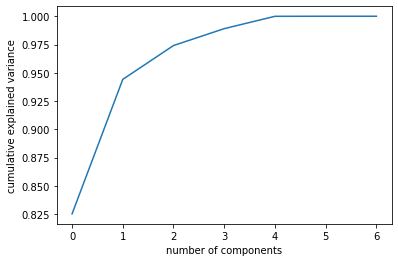

In [ ]:
plt.plot(np.cumsum(temp_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
num_components = 2
pca = PCA(num_components)
X_pca = pca.fit_transform(temp_df[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','rain','snow']])

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw")
model.fit(X_pca)

TimeSeriesKMeans(metric='dtw')

In [ ]:
centers = model.predict(X_pca)

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning:

2-Dimensional data passed. Assuming these are 25202 1-dimensional timeseries



In [ ]:
temp_df['kmeans_dtwpca'] =centers

In [ ]:
fig = px.scatter_3d(temp_df, x = 'avg_temperature', y='max_temperature', z='min_temperature',
              color='kmeans_dtwpca', opacity = 0.8, size_max=30)
fig.show(renderer="colab")

In [ ]:
temp_df.to_csv("pca_dtw.csv")

In [ ]:
!pip install dtaidistance
from dtaidistance import dtw

     |████████████████████████████████| 797 kB 12.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.6-cp37-cp37m-linux_x86_64.whl size=1593630 sha256=453ff3f85f75466b00a2817a8151afee43f3faa832dff5a2956906c1af7f00e3
  Stored in directory: /root/.cache/pip/wheels/a4/04/e5/ff7fd821276e7ec68893652d36b6a13f230ecdcafdc3283b3f
Successfully built dtaidistance


In [ ]:
X_pca

array([[ 0.51305992, -0.18561616],
       [ 0.64937039,  0.11739342],
       [ 0.91872515, -0.2358388 ],
       ...,
       [ 0.21034055, -0.15996081],
       [ 0.20968472, -0.12982304],
       [ 0.10505366, -0.18763777]])

In [ ]:
X_pca[:,1]

array([-0.18561616,  0.11739342, -0.2358388 , ..., -0.15996081,
       -0.12982304, -0.18763777])

In [ ]:
distance = dtw.distance(X_pca[:,0], X_pca[:,1])
print(distance)

18.624528395310254


## KMEANS

In [ ]:
from tslearn.metrics import dtw

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw")
model.fit(temp_df[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','rain','snow']])

TimeSeriesKMeans(metric='dtw')

In [ ]:
centers = model.predict(temp_df[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','rain','snow']])

In [ ]:
temp_df['kmeans_dtw'] =centers

In [ ]:
fig = px.scatter_3d(temp_df, x = 'avg_temperature', y='max_temperature', z='min_temperature',
              color='kmeans_dtw', opacity = 0.8, size_max=30)
fig.show(renderer="colab")

In [ ]:
fig = px.scatter_3d(temp_df, x = 'julian day', y='avg_temperature', z='min_temperature', hover_name='date',
              color='kmeans_dtw', opacity = 0.8, size_max=30,animation_frame='year', labels={'year,year,year'})
fig.show(renderer="colab",useOffset=False)

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="softdtw")
model.fit(temp_df[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','rain','snow']])

TimeSeriesKMeans(metric='softdtw')

In [ ]:
centers = model.predict(temp_df[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','rain','snow']])

In [ ]:
temp_df['kmeans_softdtw'] =centers

In [ ]:
fig = px.scatter_3d(temp_df, x = 'avg_temperature', y='max_temperature', z='min_temperature',
              color='kmeans_softdtw', opacity = 0.8, size_max=30)
fig.show(renderer="colab")

In [ ]:
fig = px.scatter_3d(temp_df, x = 'julian day', y='avg_temperature', z='min_temperature', hover_name='date',
              color='kmeans_softdtw', opacity = 0.8, size_max=30,animation_frame='year', labels={'year,year,year'})
fig.show(renderer="colab",useOffset=False)

In [ ]:
dist = pairwise_distances(temp_df[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','rain','snow']])
dunn(dist, temp_df['kmeans_dtw'])

0.0012404483034093696

In [ ]:
dist = pairwise_distances(temp_df[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','rain','snow']])
dunn(dist, temp_df['kmeans_softdtw'])

0.0012153665223788928

## Hierarchical Clustering

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(temp_df[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','rain','snow']])
labels = model.labels_

In [ ]:
temp_df['agglomerative']=labels

In [ ]:
fig = px.scatter_3d(temp_df, x = 'avg_temperature', y='max_temperature', z='min_temperature',
              color='agglomerative', opacity = 0.8, size_max=30)
fig.show(renderer="colab")

In [ ]:
fig = px.scatter_3d(temp_df, x = temp_df.index, y='avg_temperature', z='min_temperature', hover_name='date',
              color='agglomerative', opacity = 0.8, size_max=30,animation_frame='year', labels={'year,year,year'})
fig.show(renderer="colab",useOffset=False)

In [ ]:
temp_df.to_csv("new.csv")

## Mean-Shift



In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
X=temp_df[['min_temperature','max_temperature','avg_temperature']]

In [ ]:
X=X.iloc[17168:,:]
X

min_temperature  max_temperature  avg_temperature
17168             -2.0             10.4             4.20
17169             -5.7             10.3             2.30
17170             -8.0             -2.2            -5.09
17171             -2.4              3.2             0.40
17172             -4.8              1.3            -1.75
...                ...              ...              ...
25197             -6.2              0.1            -3.05
25198             -0.6              2.3             0.84
25199             -0.3              2.2             0.95
25200              0.0              2.2             1.10
25201              1.9              6.7             4.30

[8034 rows x 3 columns]

In [ ]:
# Estimate bandwith
bandwidth = estimate_bandwidth(X, quantile=0.5, n_samples=8000)

In [ ]:
# Fit Mean Shift with Scikit
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)
labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [ ]:
temp = temp_df.iloc[17168:,:]
X['date']=temp[['date']]
X

min_temperature  max_temperature  avg_temperature        date
17168             -2.0             10.4             4.20    1/3/2000
17169             -5.7             10.3             2.30    1/4/2000
17170             -8.0             -2.2            -5.09    1/5/2000
17171             -2.4              3.2             0.40    1/6/2000
17172             -4.8              1.3            -1.75    1/7/2000
...                ...              ...              ...         ...
25197             -6.2              0.1            -3.05  12/27/2021
25198             -0.6              2.3             0.84  12/28/2021
25199             -0.3              2.2             0.95  12/29/2021
25200              0.0              2.2             1.10  12/30/2021
25201              1.9              6.7             4.30  12/31/2021

[8034 rows x 4 columns]

In [ ]:
X['meanshift_clusters']=meanshift.labels_

In [ ]:
fig = px.scatter_3d(X, x = 'avg_temperature', y='max_temperature', z='min_temperature',
              color='meanshift_clusters', opacity = 0.8, size_max=30)
fig.show(renderer="colab")

In [ ]:
X['year']=temp_df[['year']]

In [ ]:
fig = px.scatter_3d(X, x = X.index, y='avg_temperature', z='min_temperature', hover_name='date',
              color='meanshift_clusters', opacity = 0.8, size_max=30,animation_frame='year', labels={'year,year,year'})
fig.show(renderer="colab",useOffset=False)

In [ ]:
from sklearn.cluster import AffinityPropagation

In [ ]:
X=temp_df[['min_temperature','max_temperature','avg_temperature']]

In [ ]:
X=X.iloc[20676:,:]
X

min_temperature  max_temperature  avg_temperature
20676             16.0             26.1            21.05
20677             17.5             25.4            21.45
20678             16.8             28.1            22.45
20679             17.1             28.4            22.75
20680             18.4             29.6            24.00
...                ...              ...              ...
25197             -6.2              0.1            -3.05
25198             -0.6              2.3             0.84
25199             -0.3              2.2             0.95
25200              0.0              2.2             1.10
25201              1.9              6.7             4.30

[4526 rows x 3 columns]

In [ ]:
clustering = AffinityPropagation(damping=0.75).fit(X)

In [ ]:
X['labels'] = clustering.labels_

In [ ]:
temp = temp_df.iloc[20676:,:]
X['date']=temp[['date']]
X

min_temperature  max_temperature  avg_temperature  labels        date
20676             16.0             26.1            21.05      35   8/11/2009
20677             17.5             25.4            21.45       6   8/12/2009
20678             16.8             28.1            22.45      35   8/13/2009
20679             17.1             28.4            22.75      18   8/14/2009
20680             18.4             29.6            24.00      18   8/15/2009
...                ...              ...              ...     ...         ...
25197             -6.2              0.1            -3.05      29  12/27/2021
25198             -0.6              2.3             0.84      38  12/28/2021
25199             -0.3              2.2             0.95      38  12/29/2021
25200              0.0              2.2             1.10      38  12/30/2021
25201              1.9              6.7             4.30       9  12/31/2021

[4526 rows x 5 columns]

In [ ]:
fig = px.scatter_3d(X, x = 'avg_temperature', y='max_temperature', z='min_temperature',
              color='labels', opacity = 0.8, size_max=30)
fig.show(renderer="colab")

In [ ]:
X['year']=temp_df[['year']]

In [ ]:
fig = px.scatter_3d(X, x = X.index, y='avg_temperature', z='min_temperature', hover_name='date',
              color='labels', opacity = 0.8, size_max=30,animation_frame='year', labels={'year,year,year'})
fig.show(renderer="colab",useOffset=False)

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
X=temp_df[['min_temperature','max_temperature','avg_temperature']]

In [ ]:
X=X.iloc[20676:,:]

In [ ]:
model = GaussianMixture(n_components=2)
# fit the model
clustering=model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)

In [ ]:
X['labels'] = yhat

In [ ]:
temp = temp_df.iloc[20676:,:]
X['date']=temp[['date']]
X

min_temperature  max_temperature  avg_temperature  labels        date
20676             16.0             26.1            21.05       1   8/11/2009
20677             17.5             25.4            21.45       1   8/12/2009
20678             16.8             28.1            22.45       1   8/13/2009
20679             17.1             28.4            22.75       1   8/14/2009
20680             18.4             29.6            24.00       1   8/15/2009
...                ...              ...              ...     ...         ...
25197             -6.2              0.1            -3.05       1  12/27/2021
25198             -0.6              2.3             0.84       0  12/28/2021
25199             -0.3              2.2             0.95       1  12/29/2021
25200              0.0              2.2             1.10       1  12/30/2021
25201              1.9              6.7             4.30       1  12/31/2021

[4526 rows x 5 columns]

In [ ]:
fig = px.scatter_3d(X, x = 'avg_temperature', y='max_temperature', z='min_temperature',
              color='labels', opacity = 0.8, size_max=30)
fig.show(renderer="colab")

In [ ]:
X['year']=temp_df[['year']]

In [ ]:
fig = px.scatter_3d(X, x = X.index, y='avg_temperature', z='min_temperature', hover_name='date',
              color='labels', opacity = 0.8, size_max=30,animation_frame='year', labels={'year,year,year'})
fig.show(renderer="colab",useOffset=False)